# Molecular Descriptors - Hydrogen Bond Donor

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Stef0916/chemoinformatics-bioinformatics/blob/main/cheminformatics-workflow/notebooks/11-Hydrogen_bond_donor-descriptor.ipynb)

1. Create Python code to calculate a molecular descriptor that represents the capacity of the molecule to be a halogen bond donor.
2. Use the code to calculate the halogen bond description for the given dataset.
3. Filter out compounds that do not have the halogen bond.
4. Save the molecular descriptor

## Strategy

- Create a query with **SMARTS** to filter the molecules which are good HBD:
    - Hydrogen bound to a heavy atom, excluding the F.
- **Test** it in few sample molecule:
    - Search for the patterns' presence.
    - Create a variable for a molecular descriptor.
- Do the **search** for all molecules.
- **Filter** the molecules without halogen bond capacity.
- **Create the molecular descriptor HBD dataset**.


# Content

1. [Load Libraries](#1)
2. [Load Dataset](#2)
3. [Grid Visualization](#3)
4. [HBD - Molecular Descriptors](#4)
    - 4.1 [SMARTS query](#5)
        - 4.1.1 [Test in few sample molecules](#6)
        - 4.1.2 [All the dataset](#7)
        - 4.1.3 [Molecular Descriptor](#8)
    - 4.2 [Filter Molecules](#9)
5. [Save the Datasets](#10)



## 1. Load Libraries<a name = 1></a>

In [1]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 14.9 MB/s eta 0:00:00


In [2]:
!pip install mols2grid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import copy

#------------------

import rdkit
from rdkit import Chem
from rdkit.Chem import Draw, PandasTools, AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True
import mols2grid

## 2. Load Dataset<a name = 2></a>

In [7]:
data = PandasTools.LoadSDF('AID_1259247_sanitized.sdf', molColName='Molecule')

In [8]:
data.shape

(5134, 7)

,PUBCHEM_SMILES,PUBCHEM_ACTIVITY_OUTCOME,Antagonist Activity,Viability Activity,Antagonist Efficacy (%),ID,Molecule
0,CN1C2=NC=NC3=C2C(=CN3[C@H]4[C@@H]([C@@H]([C@H]...,Active,active antagonist,inactive,-37.5702,,
1,C[C@]12CC[C@H]3C(=CCC4=C3C=CC(=C4)O)[C@@H]1CCC2=O,Active,active antagonist,inactive,-37.9252,,
2,C1=NC2=C(N=C(N=C2N1[C@H]3[C@H]([C@@H]([C@H](O3...,Active,active antagonist,inactive,-35.847,,
3,CCOC1=CC2=C(C3=C(C=C(C=C3)N)N=C2C=C1)N.CC(C(=O...,Active,active antagonist,inactive,-35.5194,,
4,CCCCOC(=O)C1=CC=CC=C1C(=O)OCC2=CC=CC=C2,Active,active antagonist,inactive,-39.4007,,
...,...,...,...,...,...,...,...
5129,C(/C=C\Cl)Cl,Inactive,inactive,inactive,0.0,,
5130,CC(C)OP(OC(C)C)OC(C)C,Inactive,inactive,inactive,0.0,,
5131,C1CCSC1,Inactive,inactive,inactive,0.0,,
5132,CN(CCCC(C1=CN=CC=C1)O)N=O,Inactive,inactive,inactive,0.0,,

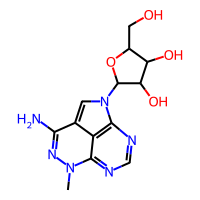
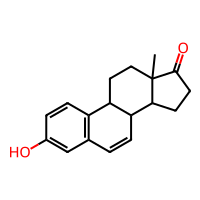
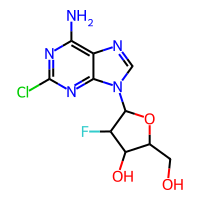
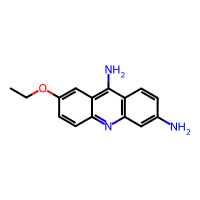
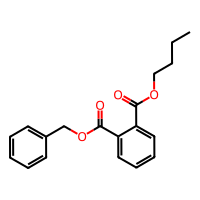
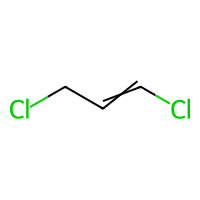
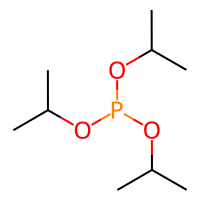
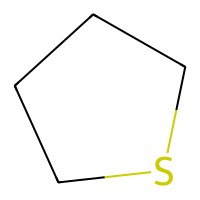
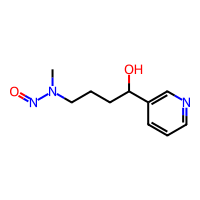
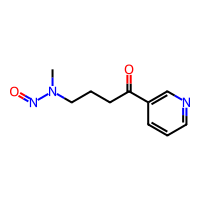

In [9]:
data

In [10]:
data['Antagonist Efficacy (%)'] = data['Antagonist Efficacy (%)'].astype('float64')

## 3. Grid Visualization<a name = 3></a>

In [13]:
mols2grid.display(data, mol_col = 'Molecule', subset = ['Antagonist Efficacy (%)', 'PUBCHEM_ACTIVITY_OUTCOME'],
                  transform = {"Antagonist Efficacy (%)": lambda x: f"{x:.2f}"})

MolGridWidget()

## 4. HBD - Molecular Descriptor<a name = 4></a>

### 4.1 SMARTS Query<a name = 5></a>

In [46]:
halogen_smarts = "[#17,#35,#53]"

'[#17,#35,#53]'

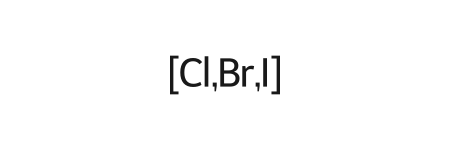

In [15]:
# Compile the SMARTS pattern
halogen_query = Chem.MolFromSmarts(halogen_smarts)
halogen_query

#### 4.1.1 Test it in few sample molecules<a name = 6></a>

**Molecule 1**


---

In [16]:
has_halogen_bond = data['Molecule'][0].HasSubstructMatch(halogen_query)
has_halogen_bond

False

In [17]:
matches_1 = data['Molecule'][0].GetSubstructMatches(halogen_query)

In [18]:
print("Number of Matches:", len(matches_1))
print("Matched Atom Indices:", matches_1)

Number of Matches: 0
Matched Atom Indices: ()


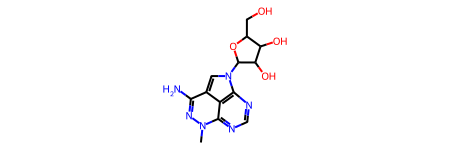

In [19]:
data['Molecule'][0]

There are not matches for molecule 1 of the dataset, which is expected because there are not halogens within the molecule.

**Molecule 2**


---

In [20]:
has_halogen_bond = data['Molecule'][2].HasSubstructMatch(halogen_query)
has_halogen_bond

True

In [21]:
matches_2 = data['Molecule'][2].GetSubstructMatches(halogen_query)

In [22]:
print("Number of Matches:", len(matches_2))
print("Matched Atom Indices:", matches_2)

Number of Matches: 1
Matched Atom Indices: ((18,),)


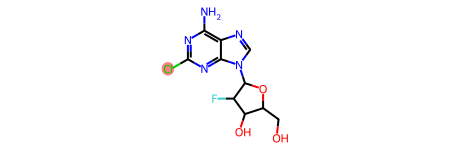

In [23]:
data['Molecule'][2]

There is 1 match for molecule 3 of the dataset, which is expected because there is 1 chlorine within the molecule.

#### 4.1.2 All the Dataset<a name = 7></a>

In [24]:
# Apply the SMARTS query to all molecules
halogen_matches = [mol.HasSubstructMatch(halogen_query) for mol in data['Molecule']]

In [25]:
len(halogen_matches)

5134

In [26]:
halogen_matches[:10]

[False, False, True, False, False, False, False, True, False, True]

#### 4.1.3 Molecular Descriptor<a name = 8></a>

In [27]:
# Create a list with binary representation
halogen_bond_descriptors = [1 if descriptor == True else 0 for descriptor in halogen_matches]

In [28]:
halogen_bond_descriptors[:10]

[0, 0, 1, 0, 0, 0, 0, 1, 0, 1]

In [29]:
len(halogen_bond_descriptors)

5134

In [30]:
halogen_bond_descriptors_df = pd.DataFrame(halogen_bond_descriptors, columns=['Hydrogen Bond Donor'])

In [31]:
halogen_bond_descriptors_df

,Hydrogen Bond Donor
0,0
1,0
2,1
3,0
4,0
...,...
5129,1
5130,0
5131,0
5132,0


### 5. Filter the molecules<a name = 9></a>

In [32]:
data['Hydrogen Bond Donor'] = data['Molecule'].apply(lambda mol: 1 if mol.HasSubstructMatch(halogen_query) else 0)

In [33]:
len(data[data['Hydrogen Bond Donor'] == 1])

856

In [44]:
data_filted = data[data['Hydrogen Bond Donor'] == 1]
data_filted

,PUBCHEM_SMILES,PUBCHEM_ACTIVITY_OUTCOME,Antagonist Activity,Viability Activity,Antagonist Efficacy (%),ID,Molecule,Hydrogen Bond Donor
2,C1=NC2=C(N=C(N=C2N1[C@H]3[C@H]([C@@H]([C@H](O3...,Active,active antagonist,inactive,-35.8470,,<rdkit.Chem.rdchem.Mol object at 0x79fddefcc660>,1
7,C1=CC=C2C(=C1)C(=O)C(C2=O)C3=NC4=CC=CC=C4C(=C3...,Active,active antagonist,inactive,-36.3573,,<rdkit.Chem.rdchem.Mol object at 0x79fddefcc9e0>,1
9,C1=CC=C(C=C1)C(C2=CC=CC=C2)(C3=CC=CC=C3)Cl,Active,active antagonist,inactive,-39.0402,,<rdkit.Chem.rdchem.Mol object at 0x79fddefccb30>,1
26,C1=CC=C2C(=C1)C(=O)C3=C(C=C(C(=C3C2=O)N)S(=O)(...,Inactive,inactive,active antagonist,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x79fddefcd460>,1
34,C1=C2C(C(=O)N(C2=CC(=C1F)Cl)C(=O)N)C(=O)C3=CC(...,Inactive,inactive,active antagonist,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x79fddefcd8c0>,1
...,...,...,...,...,...,...,...,...
5103,O.O.O.O.O.O.Cl[Dy](Cl)Cl,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x79fddcf5c3c0>,1
5106,C1=CC=C(C=C1)OC2=CC=C(C=C2)Cl,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x79fddcf5c510>,1
5107,C(COC(=O)Cl)OC(=O)Cl,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x79fddcf5c580>,1
5113,C#CC1=C(C(=O)C(=C(C1=O)Cl)Cl)C#C,Inactive,inactive,inactive,0.0000,,<rdkit.Chem.rdchem.Mol object at 0x79fddcf5c890>,1


In [45]:
#Visualization of molecules with and without HBD capacity
mols2grid.display(data_filted, mol_col="Molecule", subset=['Hydrogen Bond Donor'])

MolGridWidget()

## 6. Save the DataSet<a name = 10></a>

In [36]:
data.to_csv('data_with_HBD_descriptor.csv')

In [37]:
halogen_bond_descriptors_df.to_csv('Hal_bond_donor.csv')